## Introducción al Machine Learning
### Auto-correlación Series temporales
#### Solución al ejercicio propuesto

En este ejemplo se construye un gráfico de auto-correlación parcial para determinar si una serie temporal muestra auto-correlación.  Primero lo determinaremos sobre una serie artificialmente creada y después lo verificaremos en la serie del IBEX35

Requiere la instalación de **statsmodels**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

/home/tomas/installs/pyenvs/miax/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/tomas/installs/pyenvs/miax/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


#### Simulación de un proceso auto-regresivo AR(1)

Generaremos una serie estacionaria que sigue un proceso auto-regresivo de nivel 1 expresado en la expresión
$$ X_i = \phi X_{t-1} + \epsilon $$
El término de error $\epsilon$ lo generaremos aleatoriamente siguiendo una distribución normal estándar escalada por el factor $s$

In [2]:
X = np.zeros(500)
phi = 0.5 
s = 0.02

In [3]:
for i in range(1,500):
    X[i] = phi*X[i - 1] + np.random.randn()*s

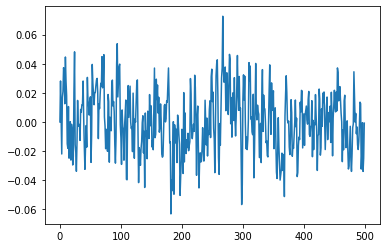

In [4]:
plt.plot(X)

Construimos el gráfico de auto-correlación parcial

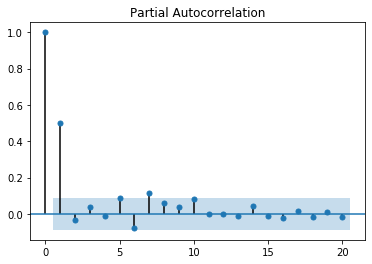

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
plot_pacf(X, lags=20, ax=ax)
plt.show()

Datos del IBEX35

In [6]:
import pickle
with open('../../data/benchmark_data.pkl', 'rb') as handle:
    benchmarks = pickle.load(handle)

In [7]:
ibex = benchmarks['ibex_div'].close

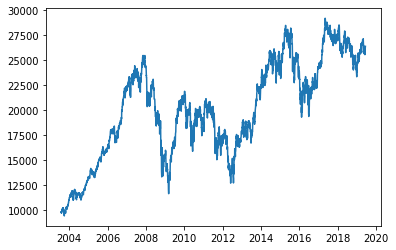

In [8]:
plt.plot(ibex)

### Ejercicio propuesto 
Verificar si una serie estacionaria del ibex (rendimientos logarítmicos) puede modelarse como un AR(1) a través de un gráfico PACF

Calculamos los rendimientos logaritmicos y verificamos visualmente que sea una serie estacionaria

In [9]:
ibex_logret = np.log(ibex).diff()

In [10]:
ibex_logret.head()

2003-07-30         NaN
2003-07-31    0.000000
2003-08-01    0.003050
2003-08-04   -0.007231
2003-08-05    0.006638
Name: close, dtype: float64

eliminamos el primer valor, ya que no tenemos rendimiento el primer día

In [11]:
ibex_logret = ibex_logret.iloc[1:]

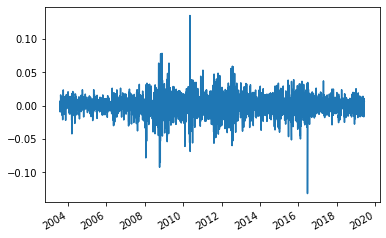

In [12]:
ibex_logret.plot()

Dibujamos el gráfico de auto-correlación parcial

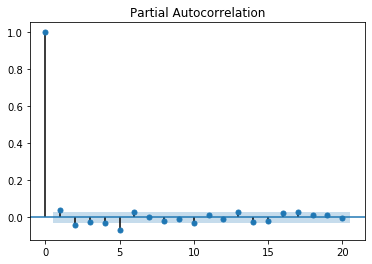

In [13]:
fig, ax = plt.subplots(figsize=(6,4))
plot_pacf(ibex_logret, lags=20, ax=ax)
plt.show()

El primer retardo está al borde del intervalo de confianza
por lo que no podemos asumir que el ibex sea modelable con un AR(1)